# Aktueller Stand der Umstellung von JDBC auf JPA

## Hintergrund

Technical Requirement AB311: „...um die Standardisierung hin zu JavaEE 8 vorzunehmen, soll die Datenbankzugriffstechnologie JPA statt JDBC genutzt werden.“

<sub><sup>JPA: Java Persistence API (neuere Zugriffsmöglichkeit auf eine Datenbank)</sub></sup><br/>
<sub><sup>JDBC: Java Database Connectivity (klassische Zugriffsmöglichkeit auf Datenbank)</sub></sup>


## Datenimport
Einlesen der Entwicklungshistorie mit Projektstand vom 15.01.2019 aus dem Git Versionskontrollsystem.

In [1]:
import pandas as pd

log = pd.read_csv("../dataset/git_log_refactoring.gz", parse_dates=[3])
log.head()

,additions,deletions,file,timestamp
0,19,0,src/main/java/org/springframework/samples/petc...,2017-12-31 19:41:29
1,55,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20
2,29,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20
3,0,99,src/main/java/org/springframework/samples/petc...,2017-12-30 00:38:54
4,19,0,src/main/java/org/springframework/samples/petc...,2017-12-30 00:38:54


## Erkennung der technischen Komponenten
Anhand des Dateipfades an der 9. Stelle kann zwischen den beiden Technologien JPA und JDBC unterschieden werden.

In [2]:
log['file'][0]

'src/main/java/org/springframework/samples/petclinic/repository/jpa/JpaOwnerRepositoryImpl.java'

Mit Hilfe eines regulären Ausdrucks können die beiden Datenbankzugriffstechnologien bestimmt werden. Alle sonstigen Dateien werden mittels `dropna()` herausgefiltert.

In [3]:
log['tech'] = log['file'].str.extract("/(jpa|jdbc)/")
log = log.dropna()
log.head()

,additions,deletions,file,timestamp,tech
0,19,0,src/main/java/org/springframework/samples/petc...,2017-12-31 19:41:29,jpa
1,55,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20,jpa
2,29,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20,jpa
32,0,47,src/main/java/org/springframework/samples/petc...,2017-12-29 15:28:42,jpa
123,0,26,src/main/java/org/springframework/samples/petc...,2017-12-25 01:27:16,jpa


## Arbeitsfortschritt
Um den Fortschritt nachvollziehen zu können, berechnen wir die geänderten Quellcodezeilen.

In [4]:
log['lines'] = log['additions'] - log['deletions']
log.head()

,additions,deletions,file,timestamp,tech,lines
0,19,0,src/main/java/org/springframework/samples/petc...,2017-12-31 19:41:29,jpa,19
1,55,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20,jpa,55
2,29,0,src/main/java/org/springframework/samples/petc...,2017-12-30 12:48:20,jpa,29
32,0,47,src/main/java/org/springframework/samples/petc...,2017-12-29 15:28:42,jpa,-47
123,0,26,src/main/java/org/springframework/samples/petc...,2017-12-25 01:27:16,jpa,-26


### Zeitliche Zusammenführung
Die jeweiligen Fortschritte werden nach ihren Zeitstempeln zusammengeführt.


In [5]:
log_timed = log.groupby(['timestamp', 'tech']).lines.sum()
log_timed.head()

timestamp            tech
2013-05-15 03:35:33  jdbc    250
2013-05-16 02:15:44  jdbc     50
2013-05-17 15:12:26  jdbc     78
2013-05-24 05:52:31  jdbc    142
2013-05-28 08:15:35  jdbc    123
Name: lines, dtype: int64

### Darstellung
Für den Vergleich der Fortschritte werden beide Technologien nebeneinander aufgeführt.

In [6]:
log_progress = log_timed.unstack().fillna(0).cumsum()
log_progress.head()

tech,jdbc,jpa
timestamp,,
2013-05-15 03:35:33,250.0,0.0
2013-05-16 02:15:44,300.0,0.0
2013-05-17 15:12:26,378.0,0.0
2013-05-24 05:52:31,520.0,0.0
2013-05-28 08:15:35,643.0,0.0


### Fortschrittsübersicht über die Jahre
Es wird eine Tabelle erzeugt, welche den Fortschrittsverlauf pro Entwicklungsjahr darstellt.

In [7]:
progress_per_year = log_progress.groupby(log_progress.index.year).last()
progress_per_year.index.name = "year"
progress_per_year

tech,jdbc,jpa
year,,
2013,5940.0,0.0
2014,12997.0,0.0
2015,7424.0,2655.0
2016,3614.0,4769.0
2017,3320.0,6761.0


### Derzeitiger Stand der Technologieumstellung
Dargestellt nach den Zeilenänderungen je Technologie.

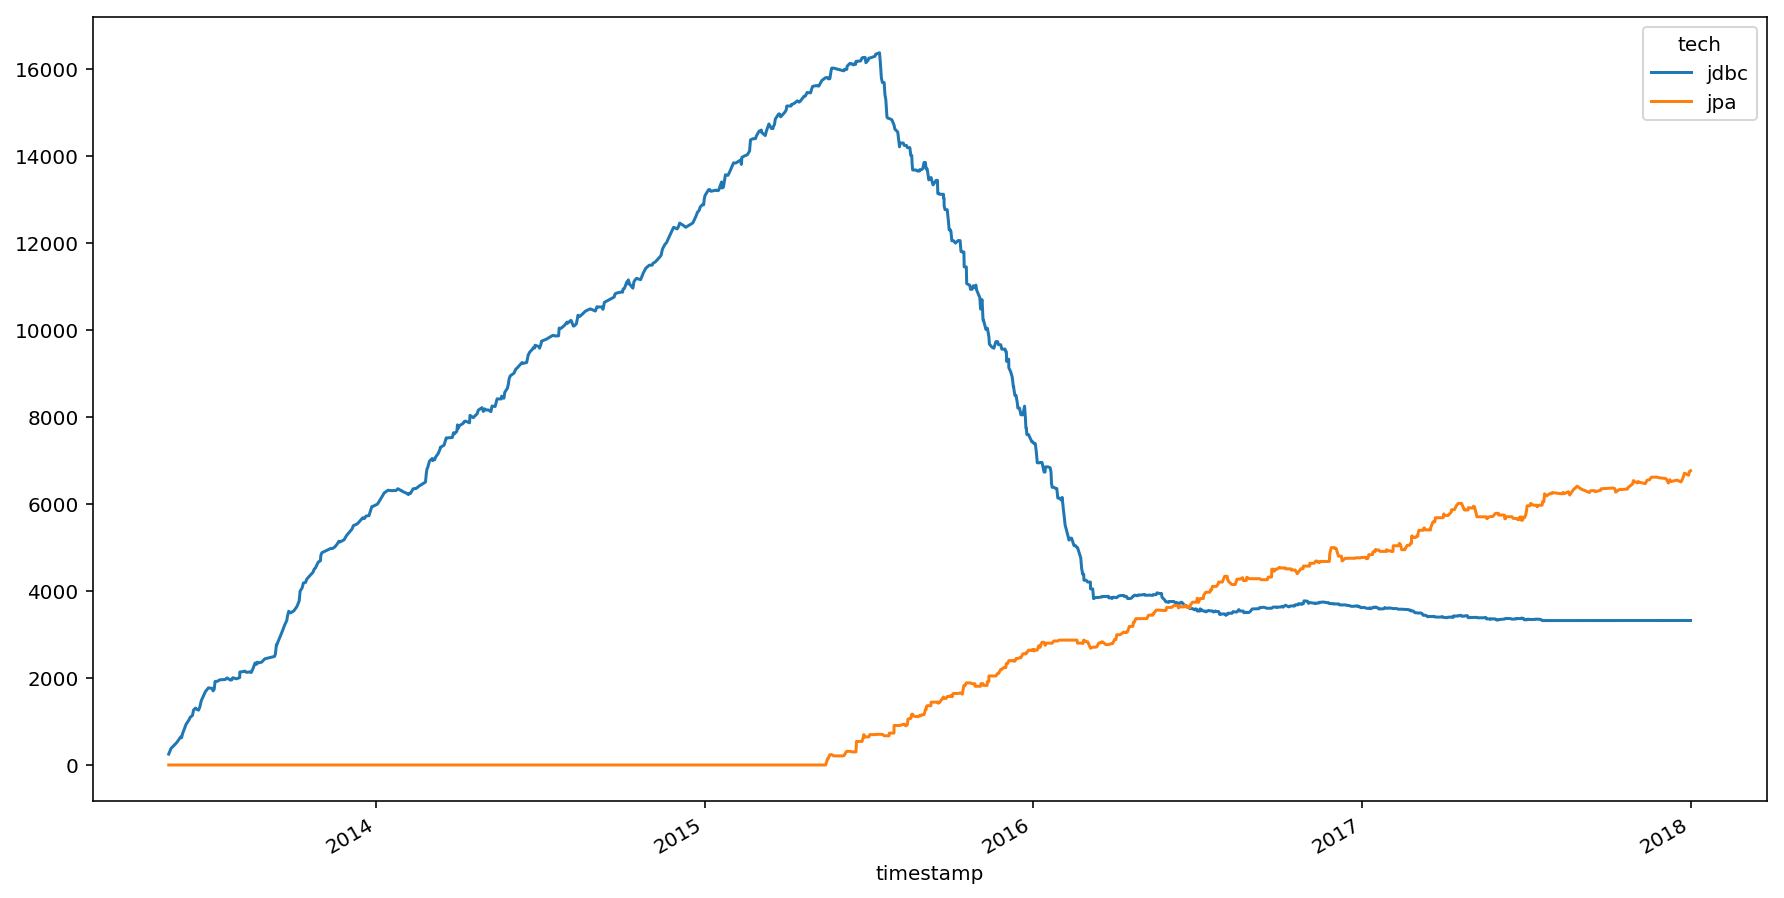

In [9]:
log_progress.plot(figsize=[15,8]);